# Kmeans Clustering tutorial

Made by: Keely Brown

Updated: May 2, 2024

Some applications require separating objects into parts, for example by tissue type, in order to create separate masks for each type. Kmeans clustering can be used to classify pixels into a user-specified number of categories. These categories can then be joined together into the discrete parts you are interested in to form separate masks. This tutorial uses the functions: `learn.train_kmeans` to take a set of images to train a classifier model, `predict_kmeans` to classify pixels in an input image using the model, and finally `mask_kmeans` to group clusters and form combined masks. 

In [2]:
import os

# Detect notebook environment
def detect_notebook_environment():
    if 'COLAB_GPU' in os.environ:
        print('Google Colaboratory detected.')
        %pip install "altair>=5" ipympl plantcv
        
        # Give access and mount your Google Drive (need a Google Account)
        from google.colab import drive
        drive.mount('/content/gdrive')
        
        # Enable widget feature with matplotlib
        from google.colab import output
        output.enable_custom_widget_manager()
        
        #View working directory, may need to change
        %pwd
    else:
        print('Binder detected.')

environment = detect_notebook_environment()

Binder detected.


In [3]:
# If working in Binder, widget may not be functioning
# %matplotlib inline
%matplotlib widget
from plantcv import plantcv as pcv
from plantcv.learn import train_kmeans
from plantcv.parallel import WorkflowInputs

In [4]:
# Set debug to the global parameter 
pcv.params.debug = "plot"
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

# Train your clustering model

Using a set of training images, `learn.train_kmeans` uses a patch-based clustering method to fit a model for classifying pixels in target images downstream. By using a patch-based method, this function finds a neighborhood of pixels around a focal pixel to inform cluster membership. The size of this neighborhood is controlled by the parameter `patch_size`. You must provide the number of clusters (`k`), which should be larger than the number of categories you expect your image to contain in order to allow for variance in within categories. *Warning: this step can take a little bit of time depending on the number of images and the patch size* 

In [5]:
# img_dir - path to training images
# k - number of clusters
# out_path - where to store the model fit file
# patch_size - pixel neighborhood size
# num_imgs - how many images to use as a training set, will choose randomly


train_kmeans(img_dir="./training_images/", 
             out_path="./kmeansout_seed.fit", k=10, patch_size=16, num_imgs=10)

MiniBatchKMeans(n_clusters=10, n_init=10, random_state=1)

# Use your model to classify target images

Once you have trained a model, use it to classify pixels in an image of interest using `pcv.predict_kmeans`. You should specify the same patch size as the model fit, so it is a good idea to keep track of model-specific patch size.

In [8]:
# Input/output options
args = WorkflowInputs(
    images=["./training_images/CoVar_0300_3.png"],
    names="image",
    result="example_results.json",
    outdir=".",
    writeimg=False,
    debug="plot"
    )

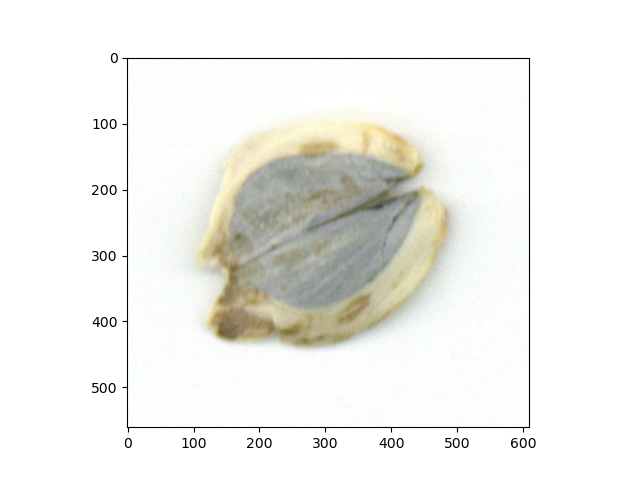

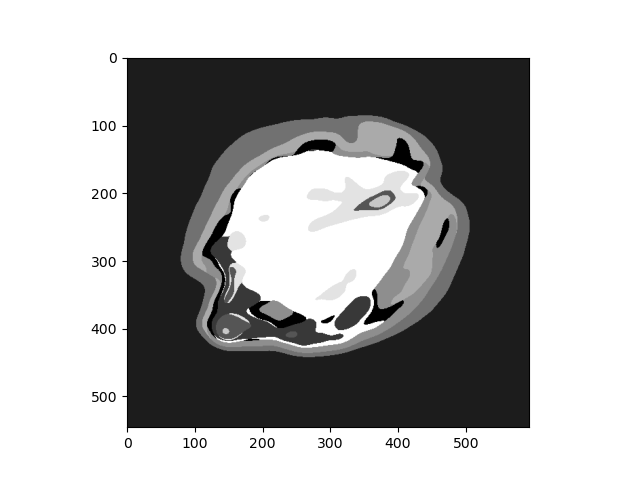

In [9]:
# Label your target image
labeled_img = pcv.predict_kmeans(img=args.image,
                                 model_path="./kmeansout_seed.fit", patch_size=16)

# Combining clusters into masks by type: Option 1

To manually combine clusters into grouped masks by object type or part of object, use `pcv.mask_kmeans`.

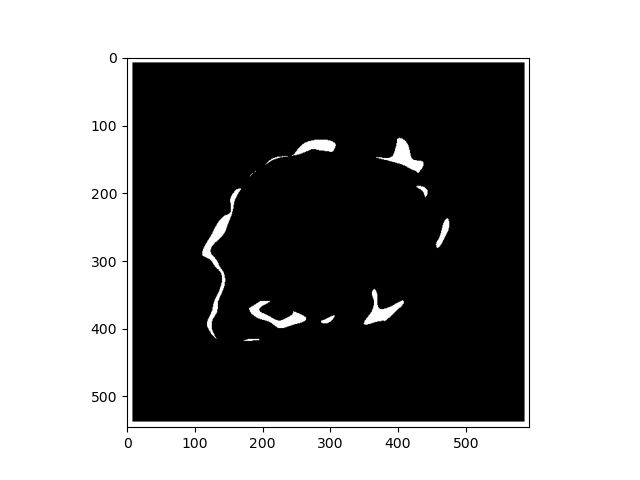

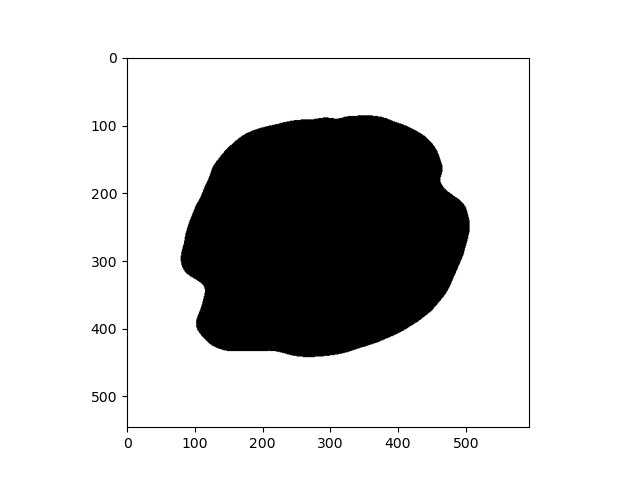

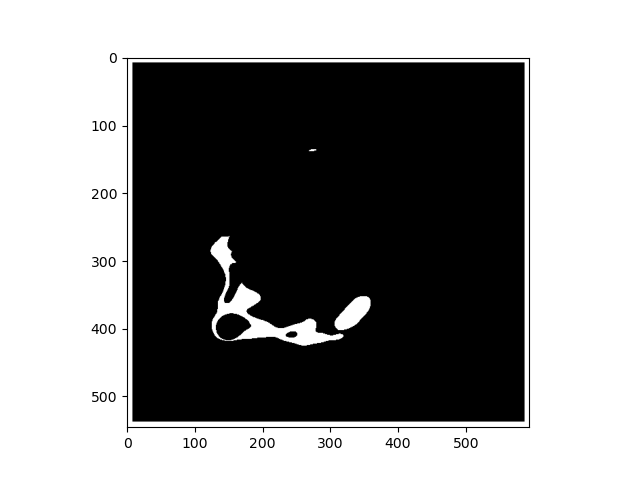

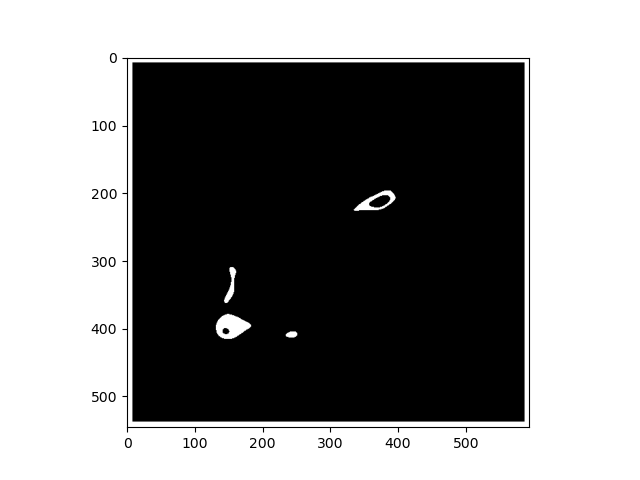

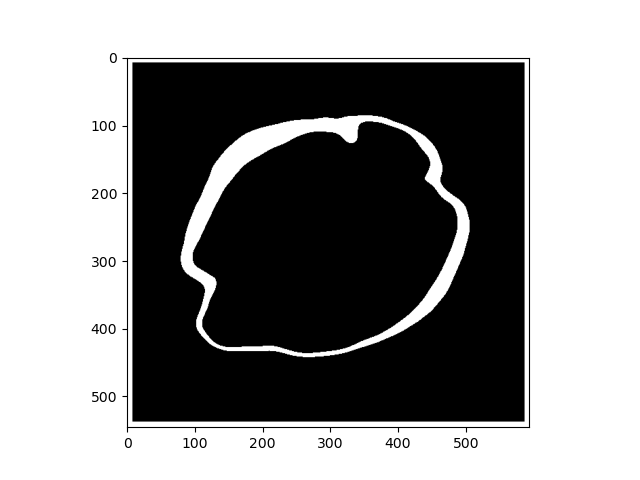

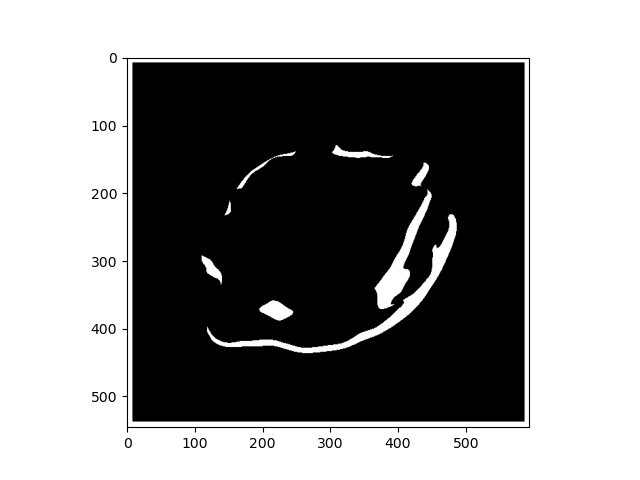

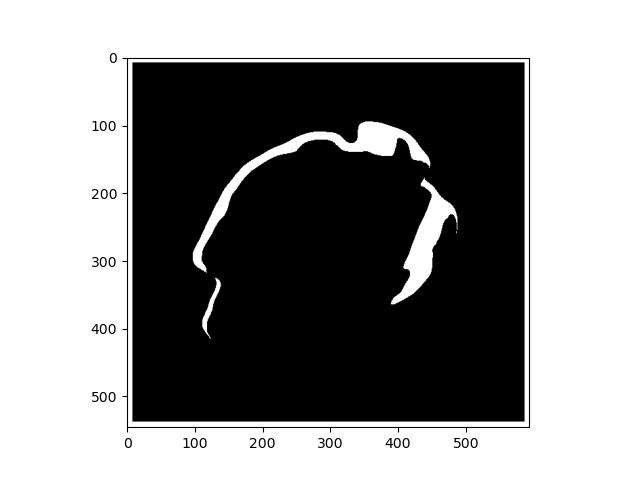

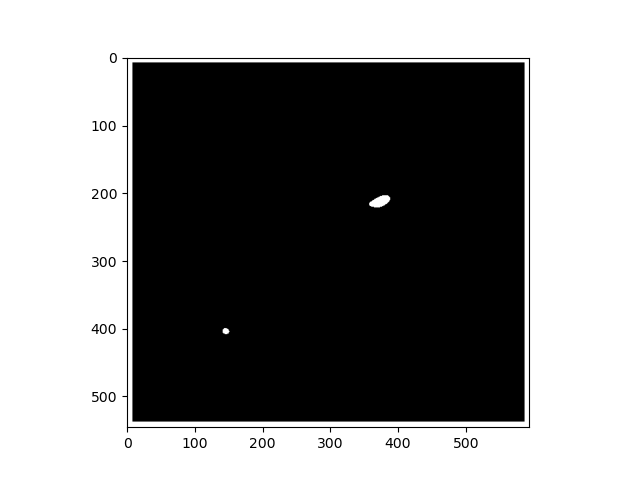

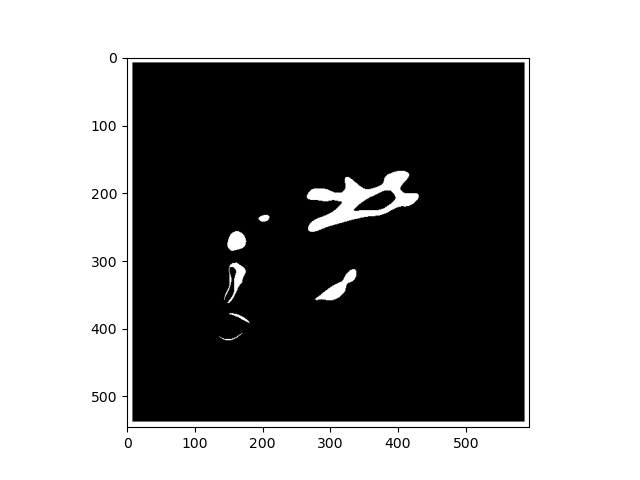

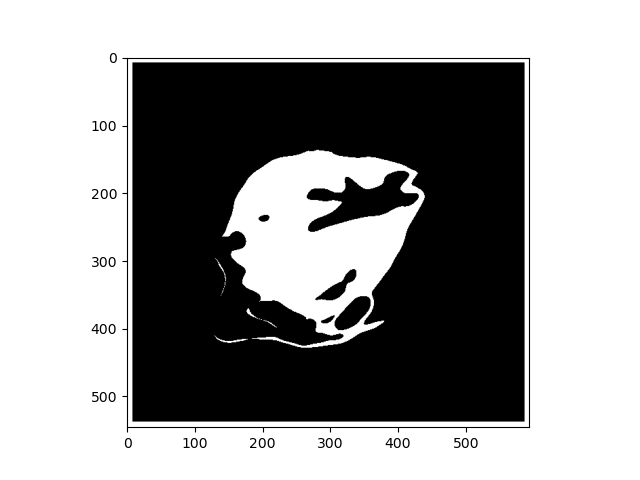

{'0': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 '1': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 '2': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 '3': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 '4': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1,

In [10]:
# Without a list of clusters, mask_kmeans will output each cluster as an individual mask
pcv.mask_kmeans(labeled_img=labeled_img, k=10, patch_size=16)

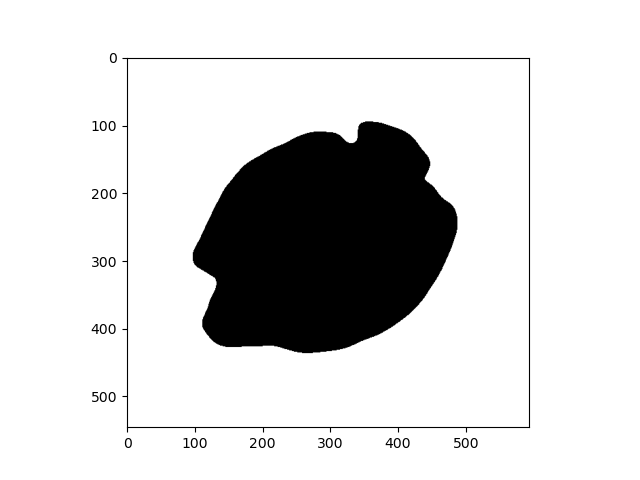

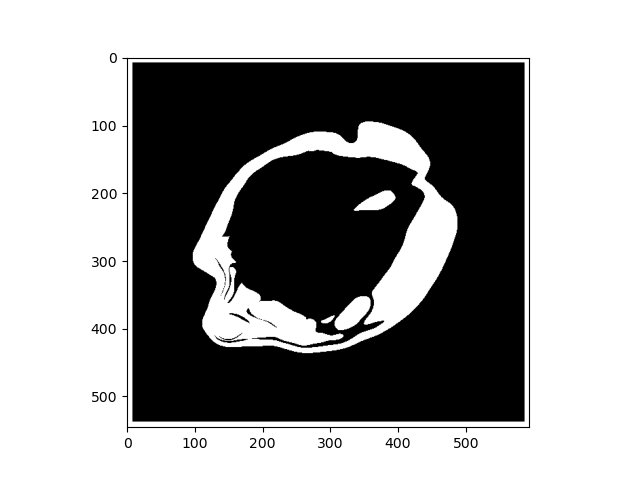

/Users/kbrown/Github/plantcv/plantcv/plantcv/plot_image.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


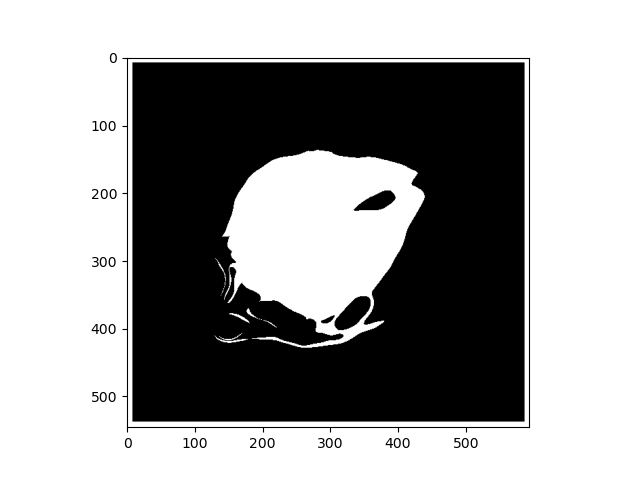

In [13]:
# Then, once you have picked the clusters belonging to each category, give mask_kmeans a list:
# Remember, the number of clusters and patch_size must be the same as your model fit 
background = pcv.mask_kmeans(labeled_img=labeled_img, k=10, patch_size=16, cat_list=[1,4])
wing = pcv.mask_kmeans(labeled_img=labeled_img, k=10, patch_size=16, cat_list=[0,2,5,6,3,7])
seed = pcv.mask_kmeans(labeled_img=labeled_img, k=10, patch_size=16, cat_list=[8,9,])

# Combining clusters into masks by type: Option 2 

[Napari join_labels from plantcv_annotate - Coming soon!]

# Tips
If you find you are not getting good distinction between categories, or clusters that span more than one category, try modifying `patch_size`, increasing `k`, or trying a different value for `sigma` (which determines the severity of blur in the image before training) in `train_kmeans`. 
